In [ ]:
import random
import math

# Define the tank and truck positions and dimensions
tank_positions = {
    'tank1': (10, 20),
    'tank2': (30, 40),
    'tank3': (50, 60)
}

tank_dimensions = {
    'tank1': (5, 5),
    'tank2': (7, 7),
    'tank3': (6, 6)
}

truck_positions = {
    'truck1': (15, 25),
    'truck2': (35, 45),
    'truck3': (55, 65),
    'truck4': (70, 80)
}

truck_dimensions = {
    'truck1': (4, 4),
    'truck2': (6, 6),
    'truck3': (5, 5),
    'truck4': (5, 5)
}

# Define the distance function
def distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# Fitness function
def fitness(solution):
    total_time = 0
    visited_tanks = set()
    refueled_trucks = set()
    for tank, truck in solution:
        tank_x, tank_y = tank_positions[tank]
        truck_x, truck_y = truck_positions[truck]
        travel_time = distance(tank_x, tank_y, truck_x, truck_y)
        total_time += travel_time  # Travel time
        if truck not in refueled_trucks:
            total_time += 20  # Time for refueling (assuming 20 minutes per truck)
            refueled_trucks.add(truck)  # Mark truck as refueled
        if tank not in visited_tanks:
            visited_tanks.add(tank)  # Mark tank as visited
    return total_time

# Genetic Algorithm
def genetic_algorithm(tanks, trucks, population_size, generations):
    random.seed(42)  # Set a fixed seed for reproducibility
    population = generate_initial_population(tanks, trucks, population_size)
    best_solution = min(population, key=lambda x: fitness(x))
    for _ in range(generations):
        new_population = []
        for _ in range(population_size):
            parent1, parent2 = random.choices(population, k=2)
            crossover_point = random.randint(1, min(len(parent1), len(parent2)) - 1)
            child = parent1[:crossover_point] + parent2[crossover_point:]
            new_population.append(child)
        population = new_population
        best_solution = min(population, key=lambda x: fitness(x))
    return best_solution

# Generate initial population
def generate_initial_population(tanks, trucks, population_size):
    population = []
    for _ in range(population_size):
        solution = []
        tanks_copy = tanks[:]  # Make a copy of the tanks list
        trucks_copy = trucks[:]  # Make a copy of the trucks list
        random.shuffle(tanks_copy)  # Shuffle the tanks list
        random.shuffle(trucks_copy)  # Shuffle the trucks list
        for tank, truck in zip(tanks_copy, trucks_copy):
            solution.append((tank, truck))  # Assign the tank to the truck
        population.append(solution)
    return population

# Example usage
tanks = list(tank_positions.keys())
trucks = list(truck_positions.keys())

POPULATION_SIZE = 10
GENERATIONS = 100

best_solution = genetic_algorithm(tanks, trucks, POPULATION_SIZE, GENERATIONS)

# Print the best solution and its fitness value
print("Best Solution:", best_solution)
print("Total Time Taken:", fitness(best_solution))


Best Solution: [('tank1', 'truck4'), ('tank3', 'truck2'), ('tank2', 'truck1')]
Total Time Taken: 187.27922061357856


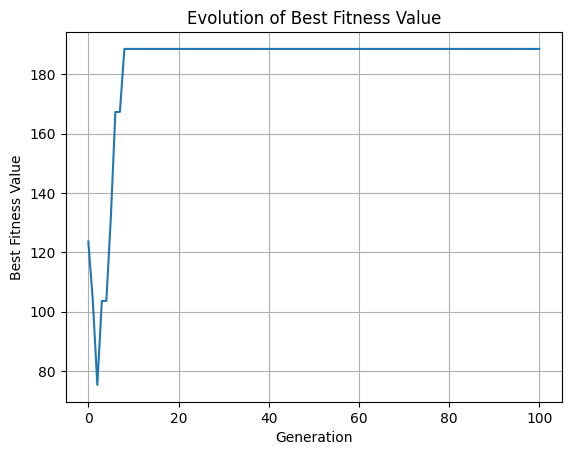

In [ ]:
import matplotlib.pyplot as plt

# Define a modified version of the genetic_algorithm function
def genetic_algorithm_fitness_evolution(tanks, trucks, population_size, generations):
    best_fitness_evolution = []  # Initialize an empty list to store best fitness values over generations
    population = generate_initial_population(tanks, trucks, population_size)
    best_solution = min(population, key=lambda x: fitness(x))
    best_fitness_evolution.append(fitness(best_solution))  # Append the initial best fitness value
    for _ in range(generations):
        new_population = []
        for _ in range(population_size):
            parent1, parent2 = random.choices(population, k=2)
            crossover_point = random.randint(1, len(tanks) - 1)
            child = parent1[:crossover_point] + parent2[crossover_point:]
            new_population.append(child)
        population = new_population
        best_solution = min(population, key=lambda x: fitness(x))
        best_fitness_evolution.append(fitness(best_solution))  # Append the best fitness value for the current generation
    return best_fitness_evolution

# Call the modified genetic_algorithm function
best_fitness_evolution = genetic_algorithm_fitness_evolution(tanks, trucks, POPULATION_SIZE, GENERATIONS)

# Plot the evolution of best fitness values
plt.plot(best_fitness_evolution)
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.title('Evolution of Best Fitness Value')
plt.grid(True)
plt.show()


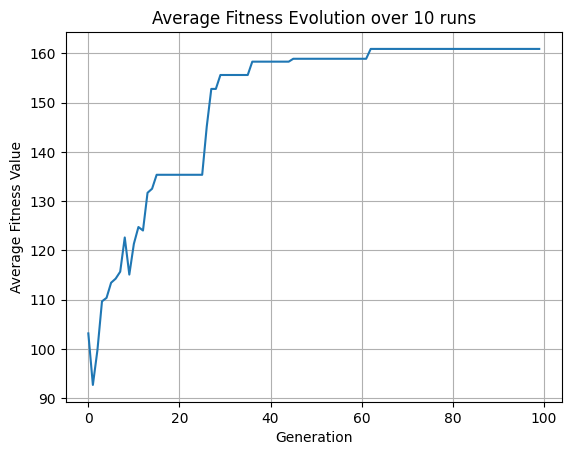

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to run the genetic algorithm and return the average fitness evolution
def evaluate_genetic_algorithm(tanks, trucks, population_size, generations, runs):
    avg_fitness_evolution = np.zeros(generations)  # Initialize an array to store average fitness values over generations
    for _ in range(runs):
        best_fitness_evolution = genetic_algorithm_fitness_evolution(tanks, trucks, population_size, generations)
        avg_fitness_evolution += np.array(best_fitness_evolution)[:generations]  # Trim the array to match the specified number of generations
    avg_fitness_evolution /= runs  # Calculate the average fitness value for each generation
    return avg_fitness_evolution

# Set parameters for evaluation
runs = 10  # Number of runs to average the results
generations = 100  # Number of generations
POPULATION_SIZE = 10

# Evaluate the genetic algorithm
avg_fitness_evolution = evaluate_genetic_algorithm(tanks, trucks, POPULATION_SIZE, generations, runs)

# Plot the average fitness evolution
plt.plot(avg_fitness_evolution)
plt.xlabel('Generation')
plt.ylabel('Average Fitness Value')
plt.title(f'Average Fitness Evolution over {runs} runs')
plt.grid(True)
plt.show()


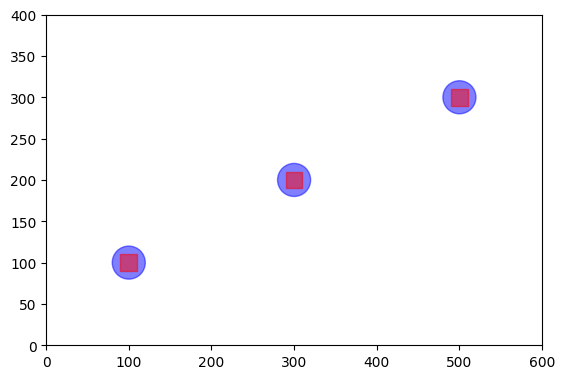

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

# Define tank and truck locations
tank_locations = {'tank1': (100, 100), 'tank2': (300, 200), 'tank3': (500, 300)}  # Example coordinates
initial_truck_location = (50, 50)  # Initial position for all trucks

# Define tank-truck assignments obtained from genetic algorithm
assignments = [('tank1', 'truck3'), ('tank2', 'truck1'), ('tank3', 'truck2')]

# Create a figure and axis
fig, ax = plt.subplots()

# Initialize empty lists to store tank and truck patches
tank_patches = []
truck_patches = []

# Initialize tank patches
for tank, (x, y) in tank_locations.items():
    tank_patch = plt.Circle((x, y), 20, color='blue', alpha=0.5)
    ax.add_patch(tank_patch)
    tank_patches.append(tank_patch)

# Initialize truck patches at the initial location
for truck, (x, y) in [('truck1', initial_truck_location), ('truck2', initial_truck_location), ('truck3', initial_truck_location)]:
    truck_patch = plt.Rectangle((x - 10, y - 10), 20, 20, color='red', alpha=0.5)
    ax.add_patch(truck_patch)
    truck_patches.append(truck_patch)

# Define function to move trucks
def move_truck(truck_patch, target_x, target_y):
    current_x, current_y = truck_patch.get_x() + 10, truck_patch.get_y() + 10  # Get center of truck patch
    dx = target_x - current_x
    dy = target_y - current_y
    dist = (dx ** 2 + dy ** 2) ** 0.5
    if dist > 5:
        ratio = 5 / dist
        dx *= ratio
        dy *= ratio
    new_x, new_y = current_x + dx, current_y + dy
    truck_patch.set_xy((new_x - 10, new_y - 10))  # Set new position of truck patch

# Update function for animation
def update(frame):
    for truck_patch, (tank, truck) in zip(truck_patches, assignments):
        target_x, target_y = tank_locations[tank]
        move_truck(truck_patch, target_x, target_y)
    return tank_patches + truck_patches  # Return both tank and truck patches

# Set limits and aspect
ax.set_xlim(0, 600)
ax.set_ylim(0, 400)
ax.set_aspect('equal')

# Create animation
ani = animation.FuncAnimation(fig, update, frames=100, interval=50, blit=True)

# Save animation as GIF
ani.save('truck_movement5.gif', writer='imagemagick', fps=20)

# Display animation
plt.show()
